<a href="https://colab.research.google.com/github/ikhsan06/ikhsan-maulana-eza/blob/main/Project_GLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import imageio
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from imutils import paths

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
main_dirs = paths.list_images("/content/drive/MyDrive/DATASET/FOREST")
train_dir = "/content/drive/MyDrive/DATASET/FOREST/Train"
val_dir = "/content/drive/MyDrive/DATASET/FOREST/Test"
CATEGORIES = []
LABELS = []

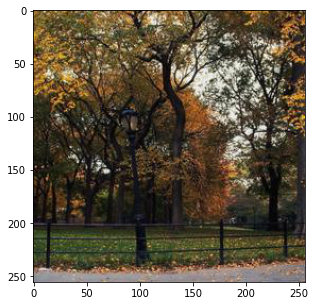

In [66]:
%matplotlib inline
image1= imageio.imread('/content/drive/MyDrive/DATASET/FOREST/Test/DRY FOREST/forest_cdmc277.jpg')
plt.figure(figsize = (5,5))
plt.imshow(image1)

In [67]:
print (image1.shape)

(256, 256, 3)


In [68]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
model = ResNet50(include_top=False,input_shape=(256, 256, 3), weights='imagenet')
input_shape = (256,256)

In [69]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [70]:
# loop over our input images
for main_dir in main_dirs:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(main_dir)
	image = np.array(image.resize((64, 64))) / 255.0
	CATEGORIES.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = main_dir.split(os.path.sep)[-2]
	LABELS.append(label)

In [71]:
print(LABELS)

['DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'DRY FOREST', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Green forest', 'Gr

In [72]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
LABELS = lb.fit_transform(LABELS)

In [73]:
print(LABELS)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [74]:
# all image's pixel will be 0 to 1

data_train = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.01,
                                  zoom_range=[0.9, 1.25],
                                  horizontal_flip=True,
                                  vertical_flip=False)

data_val = ImageDataGenerator(rescale=1./255)

#datagen_test = ImageDataGenerator(rescale=1./255)

In [75]:
batch_size = 10

# load data from its directory and subdirectory
# always point at the directory that contains sub directory

generator_train = data_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,                                                 
                                                    shuffle=True)

generator_val = data_val.flow_from_directory(directory=val_dir,
                                                target_size=input_shape,
                                                batch_size=batch_size,
                                                shuffle=False)

# generator_test = datagen_test.flow_from_directory(directory=test_dir,
#                                                   target_size=input_shape,
#                                                   batch_size=batch_size,
#                                                   shuffle=False)

Found 68 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [76]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_val = path_join(val_dir, generator_val.filenames)

cls_train = generator_train.classes
cls_val = generator_val.classes


class_names1 = list(generator_train.class_indices.keys())
class_names2 = list(generator_val.class_indices.keys())
num_classes1 = generator_train.num_classes
num_classes2 = generator_val.num_classes
print(num_classes1,num_classes2)

2 2


In [77]:
def print_layer_trainable():
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	input_4
True:	conv1_pad
True:	conv1_conv
True:	conv1_bn
True:	conv1_relu
True:	pool1_pad
True:	pool1_pool
True:	conv2_block1_1_conv
True:	conv2_block1_1_bn
True:	conv2_block1_1_relu
True:	conv2_block1_2_conv
True:	conv2_block1_2_bn
True:	conv2_block1_2_relu
True:	conv2_block1_0_conv
True:	conv2_block1_3_conv
True:	conv2_block1_0_bn
True:	conv2_block1_3_bn
True:	conv2_block1_add
True:	conv2_block1_out
True:	conv2_block2_1_conv
True:	conv2_block2_1_bn
True:	conv2_block2_1_relu
True:	conv2_block2_2_conv
True:	conv2_block2_2_bn
True:	conv2_block2_2_relu
True:	conv2_block2_3_conv
True:	conv2_block2_3_bn
True:	conv2_block2_add
True:	conv2_block2_out
True:	conv2_block3_1_conv
True:	conv2_block3_1_bn
True:	conv2_block3_1_relu
True:	conv2_block3_2_conv
True:	conv2_block3_2_bn
True:	conv2_block3_2_relu
True:	conv2_block3_3_conv
True:	conv2_block3_3_bn
True:	conv2_block3_add
True:	conv2_block3_out
True:	conv3_block1_1_conv
True:	conv3_block1_1_bn
True:	conv3_block1_1_relu
True:	conv3_block1

In [78]:
import tensorflow as tf
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [79]:
transfer_layer = model.get_layer('conv5_block3_out')
conv_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [80]:
#for layer in conv_model.layers:
#    layer.trainable = False
    
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
# it makes the 224 x 224 into a linear array 
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# dropout will remove some random num of neorons. this will prevent overweight
new_model.add(Dropout(0.5))

# assuming
new_model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
#new_model.add(Dense(512, activation='relu'))


# Add the final layer for the actual classification.
# as we detecting yes and no so num_class will be 2
new_model.add(Dense(num_classes1, activation='softmax'))

In [81]:
# here you can adjust learning rate
optimizer = RMSprop(lr=0.0001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# figure specification for training model

new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [82]:
def print_layer_trainable():
    for layer in new_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	model_3
True:	flatten_2
True:	dropout_2
True:	dense_4
True:	dense_5


In [83]:
epochs = 2
# steps_per_epoch = 10
steps_per_epoch = generator_train.n / batch_size
steps_val = generator_val.n / batch_size


history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_val,
                                  validation_steps=steps_val)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
6/6 [==============================] - 102s 13s/step - loss: 10.2657 - accuracy: 0.5882 - val_loss: 5.8998 - val_accuracy: 0.4412
Epoch 2/2
6/6 [==============================] - 90s 14s/step - loss: 0.6732 - accuracy: 0.8529 - val_loss: 5.6775 - val_accuracy: 0.4412


<Figure size 432x288 with 0 Axes>

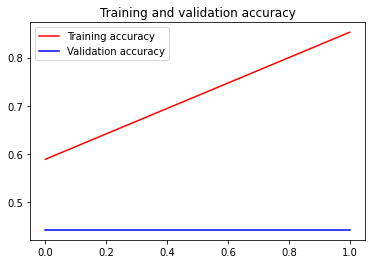

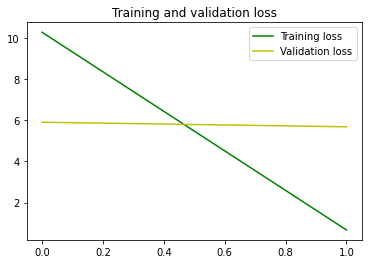

<Figure size 432x288 with 0 Axes>

In [84]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[   'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------


plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()